In [553]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [555]:
# Model / data parameters
classes = ['bags', 'cups', 'shoe', 'hand', 'keys', 'pens']
num_classes = len(classes)
input_shape = (224, 224, 3)

#base_path = '../imageclassifier/data/'
base_path = '/kaggle/input/dnnimages/'

In [556]:
X = []
y = []
for i, target in enumerate(classes):
      files = os.listdir(base_path+target)
      for file in files:
         # load the image
         img = load_img(base_path+target+'/'+file)
         # convert it to an array
         img_array = img_to_array(img)
         # append the array to X
         X.append(img_array)
         # append the numeric target to y
         y.append(i)

In [557]:
X = np.array(X)
y = np.array(y)

In [558]:
X.shape, y.shape

((952, 224, 224, 3), (952,))

In [559]:
# shuffle the data: not necessary, because data are shuffled during split in next step
#shuffler = np.random.permutation(len(X))
#X = X[shuffler]
#y = y[shuffler]

In [560]:
# split the data train-test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=17,
                                                test_size=0.2,
                                                shuffle=True)

In [561]:
# Scale images to the [0, 1] range
Xtrain = Xtrain.astype("float32") / 255
Xtest = Xtest.astype("float32") / 255

In [562]:
# one hot encode
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [564]:
# define the keras model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.ZeroPadding2D(),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(momentum=0.8),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(momentum=0.8),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(momentum=0.8),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [565]:
# model summary table
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_24 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_41 (Batc (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 110, 110, 32)      4640      
_________________________________________________________________
batch_normalization_42 (Batc (None, 110, 110, 32)      128       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 109, 109, 32)    

In [566]:
# define the batch size and number of epochs
batch_size = 128
epochs = 15

In [567]:
# complile and define eval metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [568]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0005,
    patience=3,
    verbose=1,
)

In [569]:
# fit the model
dnn = model.fit(
    Xtrain,
    ytrain,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stop],
    validation_split=0.2
)

Epoch 1/15
5/5 [==============================] - 10s 2s/step - loss: 0.9016 - accuracy: 0.7352 - val_loss: 7.3058 - val_accuracy: 0.2353
Epoch 2/15
5/5 [==============================] - 8s 2s/step - loss: 0.0900 - accuracy: 0.9852 - val_loss: 12.9529 - val_accuracy: 0.2876
Epoch 3/15
5/5 [==============================] - 9s 2s/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 7.1193 - val_accuracy: 0.4706
Epoch 4/15
5/5 [==============================] - 8s 2s/step - loss: 0.0076 - accuracy: 0.9967 - val_loss: 1.3139 - val_accuracy: 0.8235
Epoch 5/15
5/5 [==============================] - 9s 2s/step - loss: 3.2758e-04 - accuracy: 1.0000 - val_loss: 0.4910 - val_accuracy: 0.9216
Epoch 6/15
5/5 [==============================] - 9s 2s/step - loss: 0.0072 - accuracy: 0.9967 - val_loss: 0.1423 - val_accuracy: 0.9869
Epoch 7/15
5/5 [==============================] - 8s 2s/step - loss: 7.0727e-05 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 0.9804
Epoch 8/15
5/5 [===============

In [570]:
# evaluate the model and print the results
score = model.evaluate(Xtest, ytest, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04915852099657059
Test accuracy: 0.9895287752151489


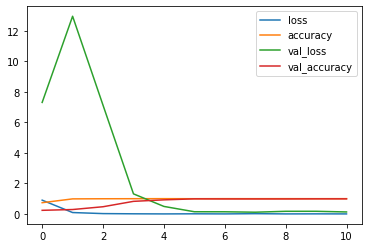

In [571]:
pd.DataFrame(dnn.history).plot();

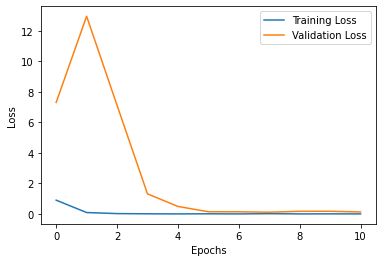

In [572]:
plt.plot(dnn.history['loss'], label = 'Training Loss')
plt.plot(dnn.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

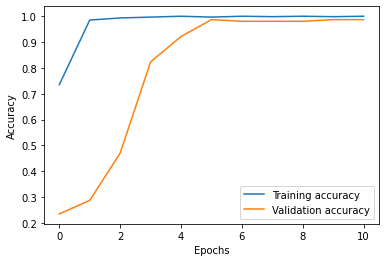

In [573]:
plt.plot(dnn.history['accuracy'], label = 'Training accuracy')
plt.plot(dnn.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# predict

In [575]:
#pic = keras.preprocessing.image.load_img("images/3.jpg",
#                                          target_size=(224,224))
#pic = np.array(pic)

In [576]:
#plt.imshow(pic)

In [577]:
#pic = np.expand_dims(pic,axis=0)
#pic.shape

In [578]:
#pred = model.predict(pic)
#decode_predictions(pred)

In [579]:
#preprocesed_image = preprocess_input(pic)
#pred_preprocessed = model.predict(preprocesed_image)
#decode_predictions(pred_preprocessed)